In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

train_dataset, test_dataset = dataset['train'], dataset['test']




In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

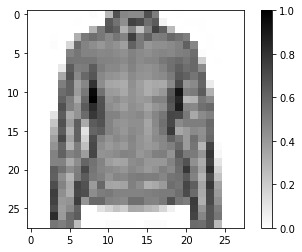

In [5]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

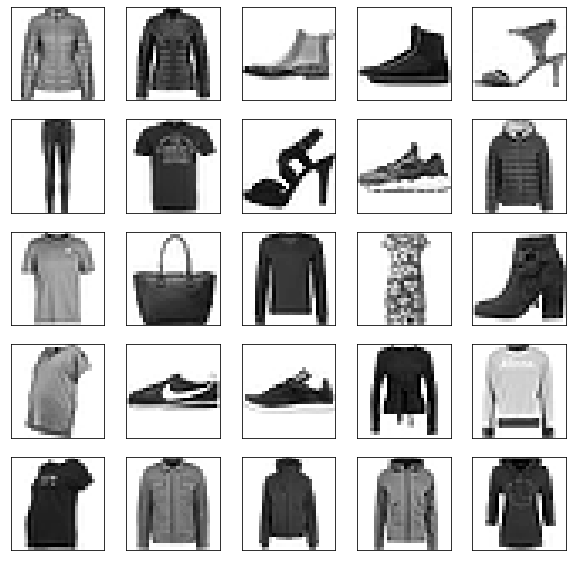

In [6]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [7]:
BATCH_SIZE = 64*3
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [8]:
print (train_dataset)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128/2, activation='relu'),

    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
hist = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(60000/BATCH_SIZE),validation_data=(test_dataset))

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9307 - val_loss: 0.3434 - val_accuracy: 0.8910
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1824 - accuracy: 0.9318 - val_loss: 0.3600 - val_accuracy: 0.8865
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9313 - val_loss: 0.3785 - val_accuracy: 0.8827
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9353 - val_loss: 0.3403 - val_accuracy: 0.8886
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1681 - accuracy: 0.9362 - val_loss: 0.3492 - val_accuracy: 0.8900


In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

53/53 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8900
Accuracy on test dataset: 0.8899999856948853


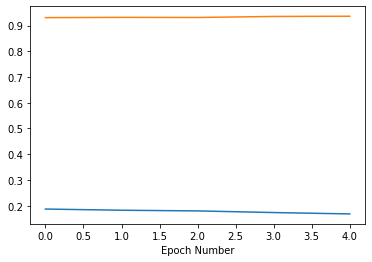

In [20]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

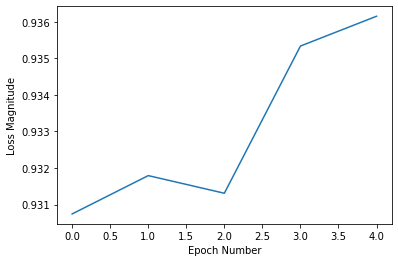

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpf6o5c68f/assets
INFO:tensorflow:Assets written to: /tmp/tmpf6o5c68f/assets


In [17]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

439420

In [26]:

predictions = model.predict(test_dataset)
#predictions=np.argmax(predictions, axis=0)
predictions = tf.argmax(predictions, axis=1)
true=tf.concat([y for x,y in test_dataset],axis=0)
array=confusion_matrix(predictions , true)

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/alaa/anaconda3/envs/tf2

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    expat-2.4.1                |       h2531618_2         168 KB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    glib-2.63.1                |       h5a9c865_0         2.9 MB
    gstreamer-1.14.0           |       hb453b48_1         3.1 MB
    kiwisolver-1.3.1           |   py38h2531618_0          80 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    libtiff-4.2.0              |       h85742a9_0         502 KB
    libwebp-base-1.2.0         |       h27cfd23_0         437 KB


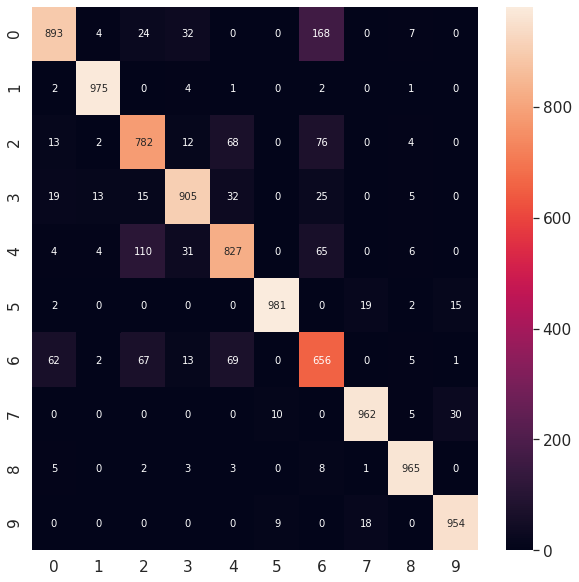

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(array, range(10), range(10))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},fmt="d") # font size

plt.show()

In [18]:
DDD

NameError: name 'sns' is not defined

In [ ]:
dddd